### 引入資料

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# pandas 模組可以直接處理excell檔案
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/colabData/weather.csv')
print(data.head(5))
print("=================================================================")
print(data.columns)

Mounted at /content/drive
   MinTemp  MaxTemp  Rainfall  ...  Label  RISK_MM RainTomorrow
0      8.0     24.3       0.0  ...      0      3.6          Yes
1     14.0     26.9       3.6  ...      1      3.6          Yes
2     13.7     23.4       3.6  ...      1     39.8          Yes
3     13.3     15.5      39.8  ...      1      2.8          Yes
4      7.6     16.1       2.8  ...      1      0.0           No

[5 rows x 23 columns]
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Label', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


### 將pandas 轉 Numpy array

In [2]:
import numpy as np

# 做出第一個特徵的矩陣
x = np.array(data["MinTemp"], dtype='float64')
x = x.reshape((x.shape[0],1))

# 做出第二個特徵的矩陣，暫存在tempArray，並與x_train合併
tempArray = np.array(data["MaxTemp"], dtype='float64')
tempArray = tempArray.reshape((tempArray.shape[0],1))
x = np.concatenate([x, tempArray], axis=1)

# 做出第三個特徵的矩陣，暫存在tempArray，並與x_train合併
tempArray = np.array(data["Pressure3pm"], dtype='float64')
tempArray = tempArray.reshape((tempArray.shape[0],1))
x = np.concatenate([x, tempArray], axis=1)

# 做出第四個特徵的矩陣，暫存在tempArray，並與x_train合併
tempArray = np.array(data["Pressure9am"], dtype='float64')
tempArray = tempArray.reshape((tempArray.shape[0],1))
x = np.concatenate([x, tempArray], axis=1)

print(x[:5])

[[   8.    24.3 1015.  1019.7]
 [  14.    26.9 1008.4 1012.4]
 [  13.7   23.4 1007.2 1009.5]
 [  13.3   15.5 1007.  1005.5]
 [   7.6   16.1 1018.5 1018.3]]


### 處理Label

In [14]:
rainInfo = np.array(data["RainTomorrow"], dtype='str')
label = np.array([])

for i in range(len(rainInfo)):
  if(rainInfo[i] == 'Yes'):
    label = np.append(label, [1])
  elif(rainInfo[i] == 'No'):
    label = np.append(label, [0])

print(rainInfo[0:10])
print(label[0:10])

y = label.reshape((label.shape[0],1))
print(y[:10])

['Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No']
[1. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]


### 產出測試集與訓練集

In [15]:
from sklearn.model_selection import train_test_split

print(x.shape)
print(y.shape)
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.05)

print(x_test.shape)
print(y_test.shape)

(356, 4)
(356, 1)
(18, 4)
(18, 1)


### 將Label資料轉成單熱編碼

In [16]:
import tensorflow as tf
y_train2 = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test2 = tf.keras.utils.to_categorical(y_test, num_classes=2)

### 建立模型

In [17]:
"""
activation: https://keras.io/zh/activations/
"""
model = tf.keras.Sequential()
# input layer: 50個神經元, 激活函數使用relu, 輸入4維資料
model.add(tf.keras.layers.Dense(units=50,activation=tf.nn.relu,input_dim=4))
# hidden layer: 50個神經元, 激活函數使用relu
model.add(tf.keras.layers.Dense(units=50,activation=tf.nn.relu))
# output layer: 2個神經元(代表兩個結果), 激活函數使用softmax
model.add(tf.keras.layers.Dense(units=2,activation=tf.nn.softmax ))

"""
optimizaer: https://keras.io/zh/optimizers/
metrics: https://keras.io/zh/metrics/
loss: https://keras.io/zh/losses/
"""

#model.compile(optimizer='adam',
#       loss = tf.keras.losses.categorical_crossentropy,
#       metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 訓練模型

In [18]:
history = model.fit(x_train, y_train2, epochs=100, batch_size=64)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 42.7522 - accuracy: 0.8166
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 19.6061 - accuracy: 0.8166
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 5.2146 - accuracy: 0.4260
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 4.3827 - accuracy: 0.8166
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 4.4056 - accuracy: 0.8166
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 1.7035 - accuracy: 0.5178
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 2.1801 - accuracy: 0.8166
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9326 - accuracy: 0.6065
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 1.3003 - accuracy: 0.8166
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9709 - accuracy: 0.6686
Epoch 11/100
6/6 [=========

### 評估模型

In [19]:
score = model.evaluate(x_test, y_test2)
print("score:",score)

1/1 [==============================] - 0s 191ms/step - loss: 0.3496 - accuracy: 0.8889
score: [0.34960609674453735, 0.8888888955116272]


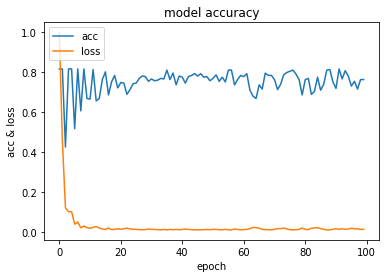

In [20]:
loss = np.array(history.history['loss'], dtype='float64')
loss = loss/max(loss)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(loss)
plt.title('model accuracy')
plt.ylabel('acc & loss')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

### 預測

In [21]:
predict = model.predict(x_test)

print("第一個測試資料:", x_test[0])
print("不下雨 機率:",predict[0][0])
print("下雨 機率:",predict[0][1])
if(np.argmax(predict[0]) == 0):
  print("預測; 不下雨")
else:
  print("預測: 下雨")
  
print(y_test2[0])

第一個測試資料: [  14.7   34.2 1013.3 1017.8]
不下雨 機率: 0.95496744
下雨 機率: 0.045032594
預測; 不下雨
[1. 0.]
